# Wizualizacja poissonowskiego strumienia zgłoszeń

## Piotr Serafin 132821

## Rozkład Poissona

Dyskretny rozkład prawdopodobieństwa, wyrażający prawdopodobieństwo szeregu wydarzeń mających miejsce w określonym czasie, gdy te wydarzenia występują ze znaną średnią częstotliwością i w sposób niezależny od czasu jaki upłynął od ostatniego zajścia takiego zdarzenia. Rozkład Poissona można również stosować w odniesieniu do liczby zdarzeń w innych określonych przedziałach, takich jak odległość, powierzchnia lub objętość. Jeśli oczekiwaną liczbą zdarzeń w tym przedziale jest λ, to prawdopodobieństwo, że jest dokładnie k wystąpień jest równe:

$$f(k,\lambda) = \frac{\lambda^k e^{-\lambda}}{k !}$$

gdzie:

* $\lambda$ jest dodatnią liczbą rzeczywistą, równą oczekiwanej liczbie zdarzeń w danym przedziale czasu
* k jest liczbą wystąpień zdarzenia

Rozkład Poissona powstaje w związku z procesami Poissona. Ma on zastosowanie do różnych zjawisk dyskretnych właściwości, gdy prawdopodobieństwo wystąpienia zjawiska jest stałe w czasie lub przestrzeni. Zwykłym zastosowaniem rozkładu Poissona jest prognozowanie liczby zdarzeń w danym czasie. Przykłady, które mogą być modelowane rozkładem Poissona to:
Liczba połączeń telefonów przychodzących do centrali na minutę.
Przy założeniu jednorodności, ile razy serwer jest dostępny na minutę.

In [37]:
# Import bibliotek
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [38]:
# Funkcja wyliczająca prawdopodobienstwo naplywu k zgloszen w przedziale czasu t
def generujRozkladPoissona(k, lamb, t):
    probability = math.pow(lamb * t, k) * math.exp(-lamb * t) / math.factorial(k)
    return probability;

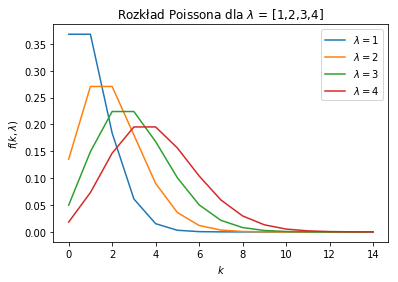

In [39]:
K = np.arange(0, 15, 1)[:, None]
lambs = np.arange(0, 40, 1)[:, None]

#Make a matrix with PMF for (rate x count) combinations
lambs_count = np.array([sp.stats.poisson(l).pmf(K) for l in lambs]).reshape(lambs.shape[0], K.shape[0])

lambs_plot = [1,2,3,4]

#Plot each rate as a function of counts K
for l in lambs_plot:
    plt.plot(K, lambs_count[l, :], label='$\lambda = {}$'.format(int(lambs[l])))

plt.title('Rozkład Poissona dla $\lambda$ = [1,2,3,4]')
plt.ylabel('$f(k,\lambda)$')
plt.xlabel('$k$')
plt.legend()
plt.show()

## Strumień zgłoszeń

Strumień zgłoszeń opisany jest w pełni przez zbiór reguł określających jednoznacznie proces napływu zgłoszeń do systemu obsługi
w określonym przedziale czasu (statystyczny opis procesu przybywania zgłoszeń do systemu obsługi).

### Strumień zgłoszeń jest:

- Regularny jeśli tworzące go zdarzenia pojawiają się w zdeterminowanych przedziałach czasu
- Stochastyczny jeśli tworzące go zdarzenia pojawiają się losowo
- Jednorodny – charakteryzuje go zawsze jedna cecha
- Niejednorodny – każde zgłoszenie ma co najmniej dwie cechy (jedną z nich jest zawsze czas napływu zgłoszenia)

Strumień ruchu opisany rozkładem Poissona jest przypadkiem strumienia prostego.

### Cechy strumienia prostego:

- Stacjonarność – prawdopodobieństwo pojawienia się pewnej liczby zgłoszeń w przedziale czasu zależy od długości tego przedziału, a nie jego położenia na osi czasu
- Brak pamięci - dla dowolnych rozłącznych przedziałów czasu liczba zgłoszeń zachodzących w jednym z nich nie zależy od liczby zgłoszeń zachodzących w pozostałych przedziałach
- Pojedynczość – dwa lub więcej zgłoszeń nie mogą się pojawić w tym samym czasie

Rozkład Poissona bardzo dobrze opisuje jeden strumień zgłoszeń generowany przez bardzo dużą liczbę źródeł ruchu, teoretycznie nieskończenie dużą

Prawdopodobieństwo napływu k zgłoszeń w przedziale czasu t przy intensywności zgłoszeń $\lambda$:

$$P(t) = \frac{(\lambda t)^k e^{-\lambda t}} {k !}$$


## Generowanie strumienia zgłoszeń

Strumień zdarzeń o rozkładzie Poissona charakteryzuje się wykładniczym rozkładem długości odstępów czasu między zdarzeniami. Jeżeli założymy, że $1200$ połączeń wykonywanych jest w ciągu dnia, to średnio $\frac{1200}{24} = 50$ połączenień wykonywanych jest w ciągu godziny. Z tego wynika, że co $\lambda = 72$ sekundy napływa zgłoszenie. Mając te dane, możemy zadać sobie pytanie: 

Jakie jest prawdopodobieństwo, żę w ciągu następnych 20 sekund pojawi się zgłoszenie?

Na to pytanie odpowiada dystrybuanta rozkładu wykładniczego przedstawiona poniżej.

## Generownie czasu zgłoszeń

Następnym krokiem w symulacji jest wygenerowanie czasu pojawienia się zgłoszenia w systemie. Czas ten powinien zgadzać się z rozkładem wykładniczym długości odstępów czasu między zdarzeniami. Aby to zrobić, użyjemy generatora liczb pseudolosowych między 0 i 1. Należy znaleźć funkcję odwrotną do funkcji dystrybuanty rozkładu wykładniczego:


$$F(x) = 1 - e^{-\lambda x}$$
$$e^{-\lambda x} = 1 - F(x)$$
$$-\lambda x = \ln (1-F(x))$$
$$x = \frac{-\ln(1-F(x))}{\lambda}$$

$$nastepnyCzas = \frac{-\ln U}{\lambda}$$

Gdzie U to liczba pseudolosowa z zakresu $[0,1)$

### Prawdopodobieństwo wystąpienia k żądań w odcinku czasu [0, t]

Ostatnim krokiem symulacji jest wyliczenie prawdopodobieństwa napływu k zgłoszeń w wygenerowanych przedziałach.
Korzystamy z ze wzoru definiującego rozkład Poissona. Prawdopodobieństwo napływu k zgłoszeń w przedziale czasu t przy intensywności zgłoszeń

$$P(t) = \frac{(\lambda t)^k e^{-\lambda t}} {k !}$$

